## Evaluation

Exercise 1: The 10-armed bandit

1.)
>Generate reward probabilities - <span style="color:red">0</span><br>

2.)
>Implement ```generate_reward``` and test <span style="color:red">0,5/0,5</span><br>

3.)
>Implement ```update_Q``` - <span style="color:red">1/1</span><br>

4.)
>Implement ```epsilon_greedy``` - <span style="color:red">1/1</span><br>

5.)
>Run the greedy policy for 1000 iterations for 20 lives - <span style="color:red">1/1</span><br>
>Plot curves in one plot - <span style="color:red">0,5/0,5</span><br>
>Discuss if they identify the max action - <span style="color:red">0/0,5</span><br>

6.)
>Run different $\epsilon$-greedy policies for 1000 iterations and 100 lives - <span style="color:red">1/1</span><br>
>Plot average online and offline performance for each policy (including a maximum performance horizontal line) - <span style="color:red">1/1</span><br>
>Discuss the differences between online and offline performance - <span style="color:red">0,5/1</span><br>
>Discuss the differences between policies- <span style="color:red">0,5/1</span><br>

7.)
>Implement ```softmax``` - <span style="color:red">1/1</span><br>
>Run different softmax policies for 5000 iterations and 100 lives - <span style="color:red">1/1</span><br>
>Plot average online and offline performance for each policy - <span style="color:red">0,5/0,5</span><br>
>Discuss potential improvements - <span style="color:red">0/0,5</span><br>
>Discuss the influence of $\beta$ in the light of exploration/exploitation - <span style="color:red">0,5/0,5</span><br>
>Discuss the differences between online and offline performance - <span style="color:red">0/1</span><br>
>Discuss the differences between policies- <span style="color:red">0,5/1</span><br>

8.)
>Implement a catastrophic action - <span style="color:red">0</span><br>
>Run softmax policy and $\epsilon$-greedy policy for 1000 iterations and 500 lives - <span style="color:red">0,5/0,5</span><br>
>Plot average online and offline performance for each policy - <span style="color:red">0,5/0,5</span><br>
>Discuss differences between the policies and explain - <span style="color:red">0,5/1</span><br>

9.)
>Implement a schedule for $\beta$ and parametrize it by $b$ - <span style="color:red">1/1</span><br>
>Run different $b$-policies for 2000 iterations and 100 lives - <span style="color:red">1/1</span><br>
>Plot cumulative reward and explain - <span style="color:red">0,5/0,5</span><br>
>Plot final cumulative reward against $b$ and explain - <span style="color:red">0,5/0,5</span><br>
>Discuss the idea behind a schedule for $\beta$  in the light of exploration/exploitation- <span style="color:red">0,5/0,5</span><br>
>Propose a similar strategy for $\epsilon$-greedy - <span style="color:red">0,5/0,5</span><br>


Total <span style="color:red">16/20</span><br>

## Reinforcement Learning I - ZAKI, ATANASZOV

In [2]:
from __future__ import print_function, division
import numpy as np
import matplotlib.pyplot as plt
%pylab inline
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


### Exercise 1: The 10-armed bandit

#### 1.1

In [3]:
def multiple_maxima(a):
    """
    return multiple maxima indicies if there are
    """
    a=np.asarray(a)
    a_max = np.max(a)
    num_max = len(a[a==a_max])
    return np.argsort(a)[::-1][:num_max]

class Agent(object):
    def __init__(self, num_levers = 10, eta = 0.01, factor = np.ones(10)):
        self.num_levers= num_levers
        self.eta = eta
        self.beta = None
        self.eps = None
        self.P = None
        self.R = None
        self.profit = 0
        self.p = np.random.uniform(high=.9, size = self.num_levers)
        self.Q = np.zeros(num_levers)
        self.factor = factor
        
    def generate_reward(self, ind):
        R = self.factor[ind]*np.random.binomial(1, self.p[ind])
        self.R = R
        self.profit += R
        return R
    
    def reset_agent(self):
        self.Q = np.zeros(self.num_levers)
        self.profit = 0
        
    
    def eps_greedy(self, eps=0):
        """
        eps_greedy policy
        """
        self.eps = eps
        choice = np.random.binomial(1,1-eps)
        Q_new = np.zeros(self.num_levers)
        if choice==1:
            ind = multiple_maxima(self.Q) #if multiple actions have the same Q, they are all updated
        else:
            ind = np.random.randint(0, high=10)
            
        Q_new[ind] += self.eta * (self.generate_reward(ind) - self.Q[ind])
        self.Q += Q_new
        return self.Q.max(), ind
    
    def softmax(self, beta = 1):
        """
        softmax policy
        """
        self.beta = beta
        P = np.zeros_like(self.Q)
        P = np.exp(self.beta * self.Q)
        P = self.div(P, np.sum(P))
        self.P = P
        ind = np.random.choice(np.arange(self.num_levers), replace=True, p=P)
        self.Q[ind] += self.eta * (self.generate_reward(ind) - self.Q[ind])
        return self.Q.max(), ind
    
    @staticmethod
    def div(a,b):
        """
        division method that handles inf/inf = 1.0 cases
        """
        m = np.isinf(a) * np.isinf(b)
        out = a/b
        out[m] = 1.0/np.max([np.sum(m), 1])
        return out
        
    
agent = Agent(num_levers=10, eta = 0.01)

#### 1.2

In [3]:
print('mean_reward\t p')
for l in range(agent.num_levers):   
    r = [agent.generate_reward(l) for i in range(int(1e5))]
    print(np.sum(r)/len(r), ' ' , agent.p[l])

mean_reward	 p
0.38049   0.380495712071
0.89487   0.89637351363
0.84403   0.844142316798
0.88486   0.883590255895
0.61839   0.616912120658
0.63055   0.63151625264
0.53896   0.538121306733
0.85708   0.857287904079
0.22132   0.222549962584
0.7337   0.73195958288


#### 1.3

In [4]:
t_max = int(1e5)
agent.Q #storing current Q-values of the agent for time t

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

#### 1.4

In [5]:
print(agent.eps_greedy.__doc__)


        eps_greedy policy
        


#### 1.5


In [6]:
#simulate for t_max timesteps
t_max = int(1e3)
Q_max = np.zeros((20, t_max))
Q = np.zeros((agent.num_levers, t_max))
Q_weighted = np.zeros((20, t_max))

for n in range(20):
    q_max = np.zeros(t_max)
    agent.reset_agent()
    for t in range(1, t_max):
        q_max[t], inds_updated = agent.eps_greedy(eps = 0)
        Q[:,t] = agent.Q #store Q_t
        Q_weighted[n, t] = (1-agent.eps) * q_max[t] + (agent.eps/agent.num_levers) * np.sum(agent.Q) 
    Q_max[n] = q_max

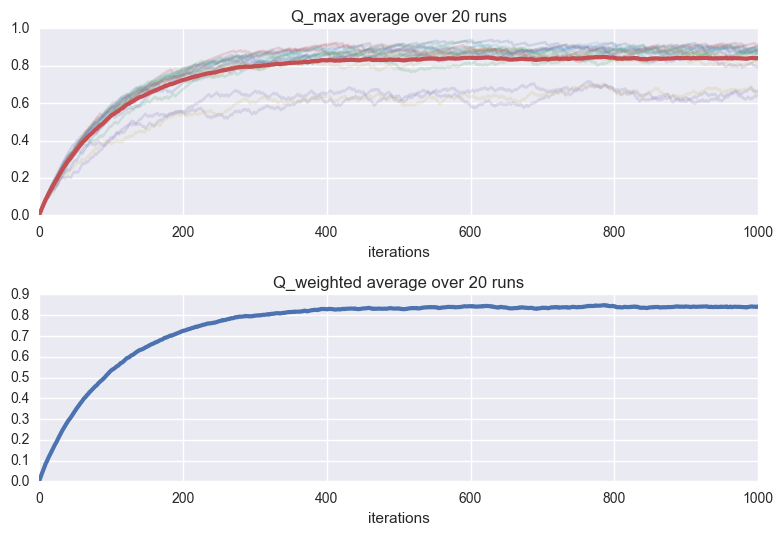

In [7]:
Q_weighted_avg = Q_weighted.mean(axis = 0)
Q_max_avg = Q_max.mean(axis = 0)

fig, axs = plt.subplots(2,1)
for q in Q_max:
    axs[0].plot(q, alpha = 0.2)
axs[0].plot(Q_max_avg, lw = 3.0)
axs[0].set_title('Q_max average over 20 runs')
axs[1].plot(Q_weighted_avg, lw = 3.0)
axs[1].set_title('Q_weighted average over 20 runs')
plt.setp(axs, xlabel = 'iterations')
fig.tight_layout()

#### 1.6

In [8]:
#simulate for t_max timesteps
t_max = int(1e3)
num_lifes = 100
epsilons = [0.0, 0.01, 0.1, 0.5]
Q_max = np.zeros((len(epsilons), num_lifes, t_max))
Q = np.zeros((len(epsilons), agent.num_levers, t_max))
Q_weighted = np.zeros((len(epsilons), num_lifes, t_max))

for e, eps in enumerate(epsilons):
    for n in range(num_lifes):
        q_max = np.zeros(t_max)
        agent.reset_agent()
        for t in range(1, t_max):
            q_max[t], inds_updated = agent.eps_greedy(eps = eps)
            Q[e, :,t] = agent.Q #store Q_t
            Q_weighted[e, n, t] = (1-agent.eps) * q_max[t] + (agent.eps/agent.num_levers) * np.sum(agent.Q) 
        Q_max[e, n] = q_max

In [9]:
Q_weighted_avg = Q_weighted.mean(axis = 1)
Q_max_avg = Q_max.mean(axis=1)

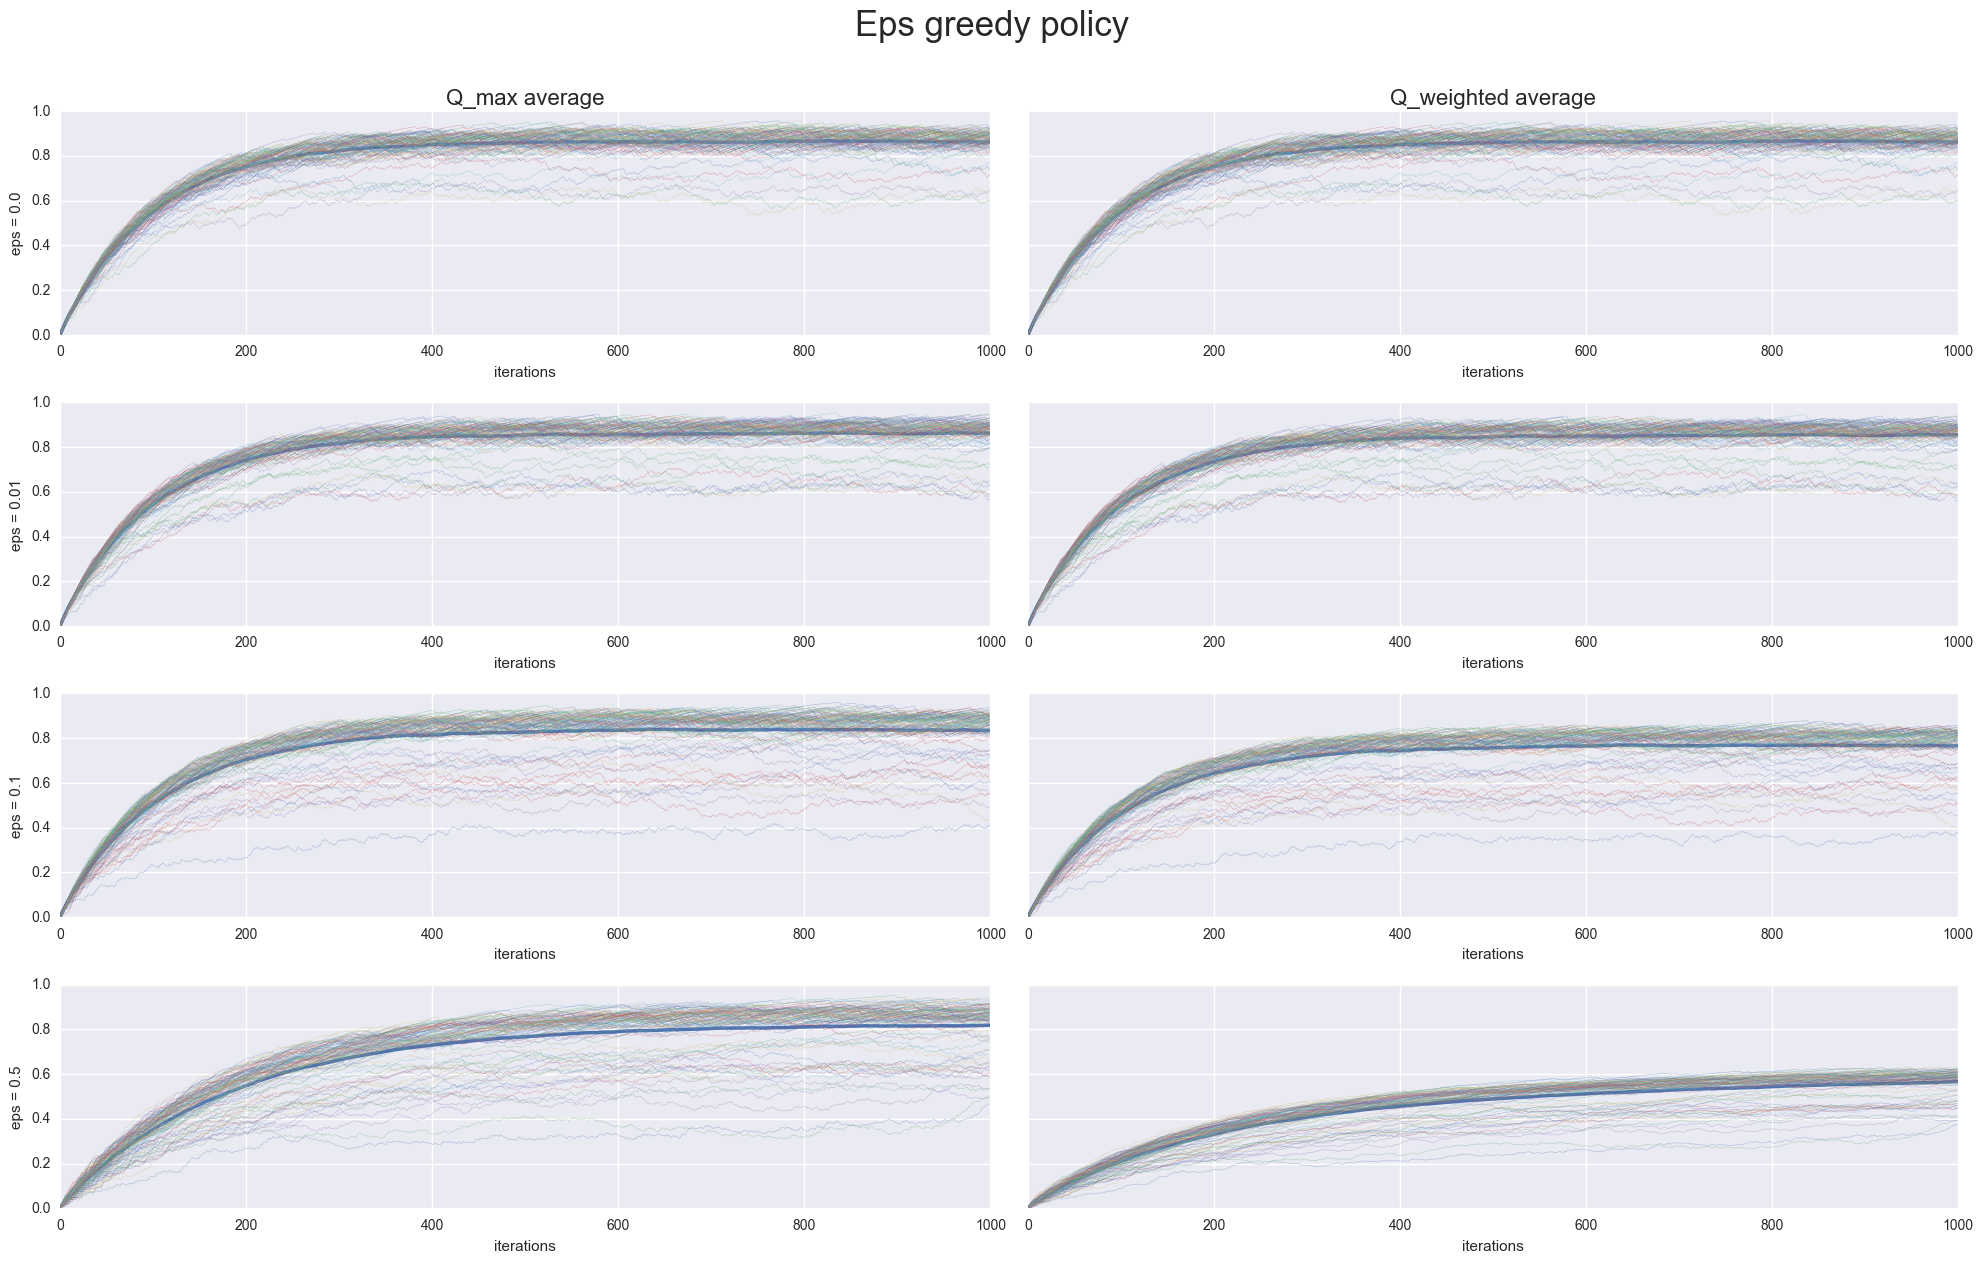

In [10]:
fig, axs = plt.subplots(4, 2, figsize = (20,12), sharey=True)
for i in range(4):
    axs[i, 0].plot(Q_max_avg[i, :], lw = 2.5)
    for trial in Q_max[i]:
        axs[i, 0].plot(trial, alpha = 0.4, lw = 0.4)
    axs[i, 1].plot(Q_weighted_avg[i, :], lw = 2.5)
    for trial in Q_weighted[i]:
        axs[i, 1].plot(trial, alpha = 0.4, lw = 0.4)
    axs[i,0].set_ylabel('eps = {}'.format(epsilons[i]))
axs[0,0].set_title('Q_max average', fontsize= 16)
axs[0,1].set_title('Q_weighted average', fontsize= 16)
fig.suptitle('Eps greedy policy', fontsize = 25, y= 1.05)
plt.setp(axs, xlabel = 'iterations')
fig.tight_layout()
plt.show()

The expected reward (i.e. weighted sum of $Q$-values) decreases as $\epsilon$ increases because the weight given to the maximum $Q$ decreases while the weight assigned to the average increases.
The theoretical maximum $Q$ value remains unchanged if $\epsilon$ varies, however the rate at which the values of the agent converge to that theoretical maximum decreases as it has less steps in which the maximum $Q$ value is adjusted.

#### 1.7

In [11]:
t_max = int(5e3)
num_lifes = 100
betas = [1, 5, 15, 50]

Q_max = np.zeros((len(betas), num_lifes, t_max))
Q = np.zeros((len(betas), agent.num_levers, t_max))
Q_weighted = np.zeros((len(betas), num_lifes, t_max))

for b, beta in enumerate(betas):
    for n in range(num_lifes):
        q_max = np.zeros(t_max)
        agent.reset_agent()
        for t in range(1, t_max):
            q_max[t], inds_updated = agent.softmax(beta = beta)
            Q[b, :, t] = agent.Q #store Q_t
            Q_weighted[b, n, t] = np.dot(agent.P, Q[b, :, t])
        Q_max[b, n] = q_max

In [12]:
Q_weighted_avg = Q_weighted.mean(axis = 1)
Q_max_avg = Q_max.mean(axis=1)

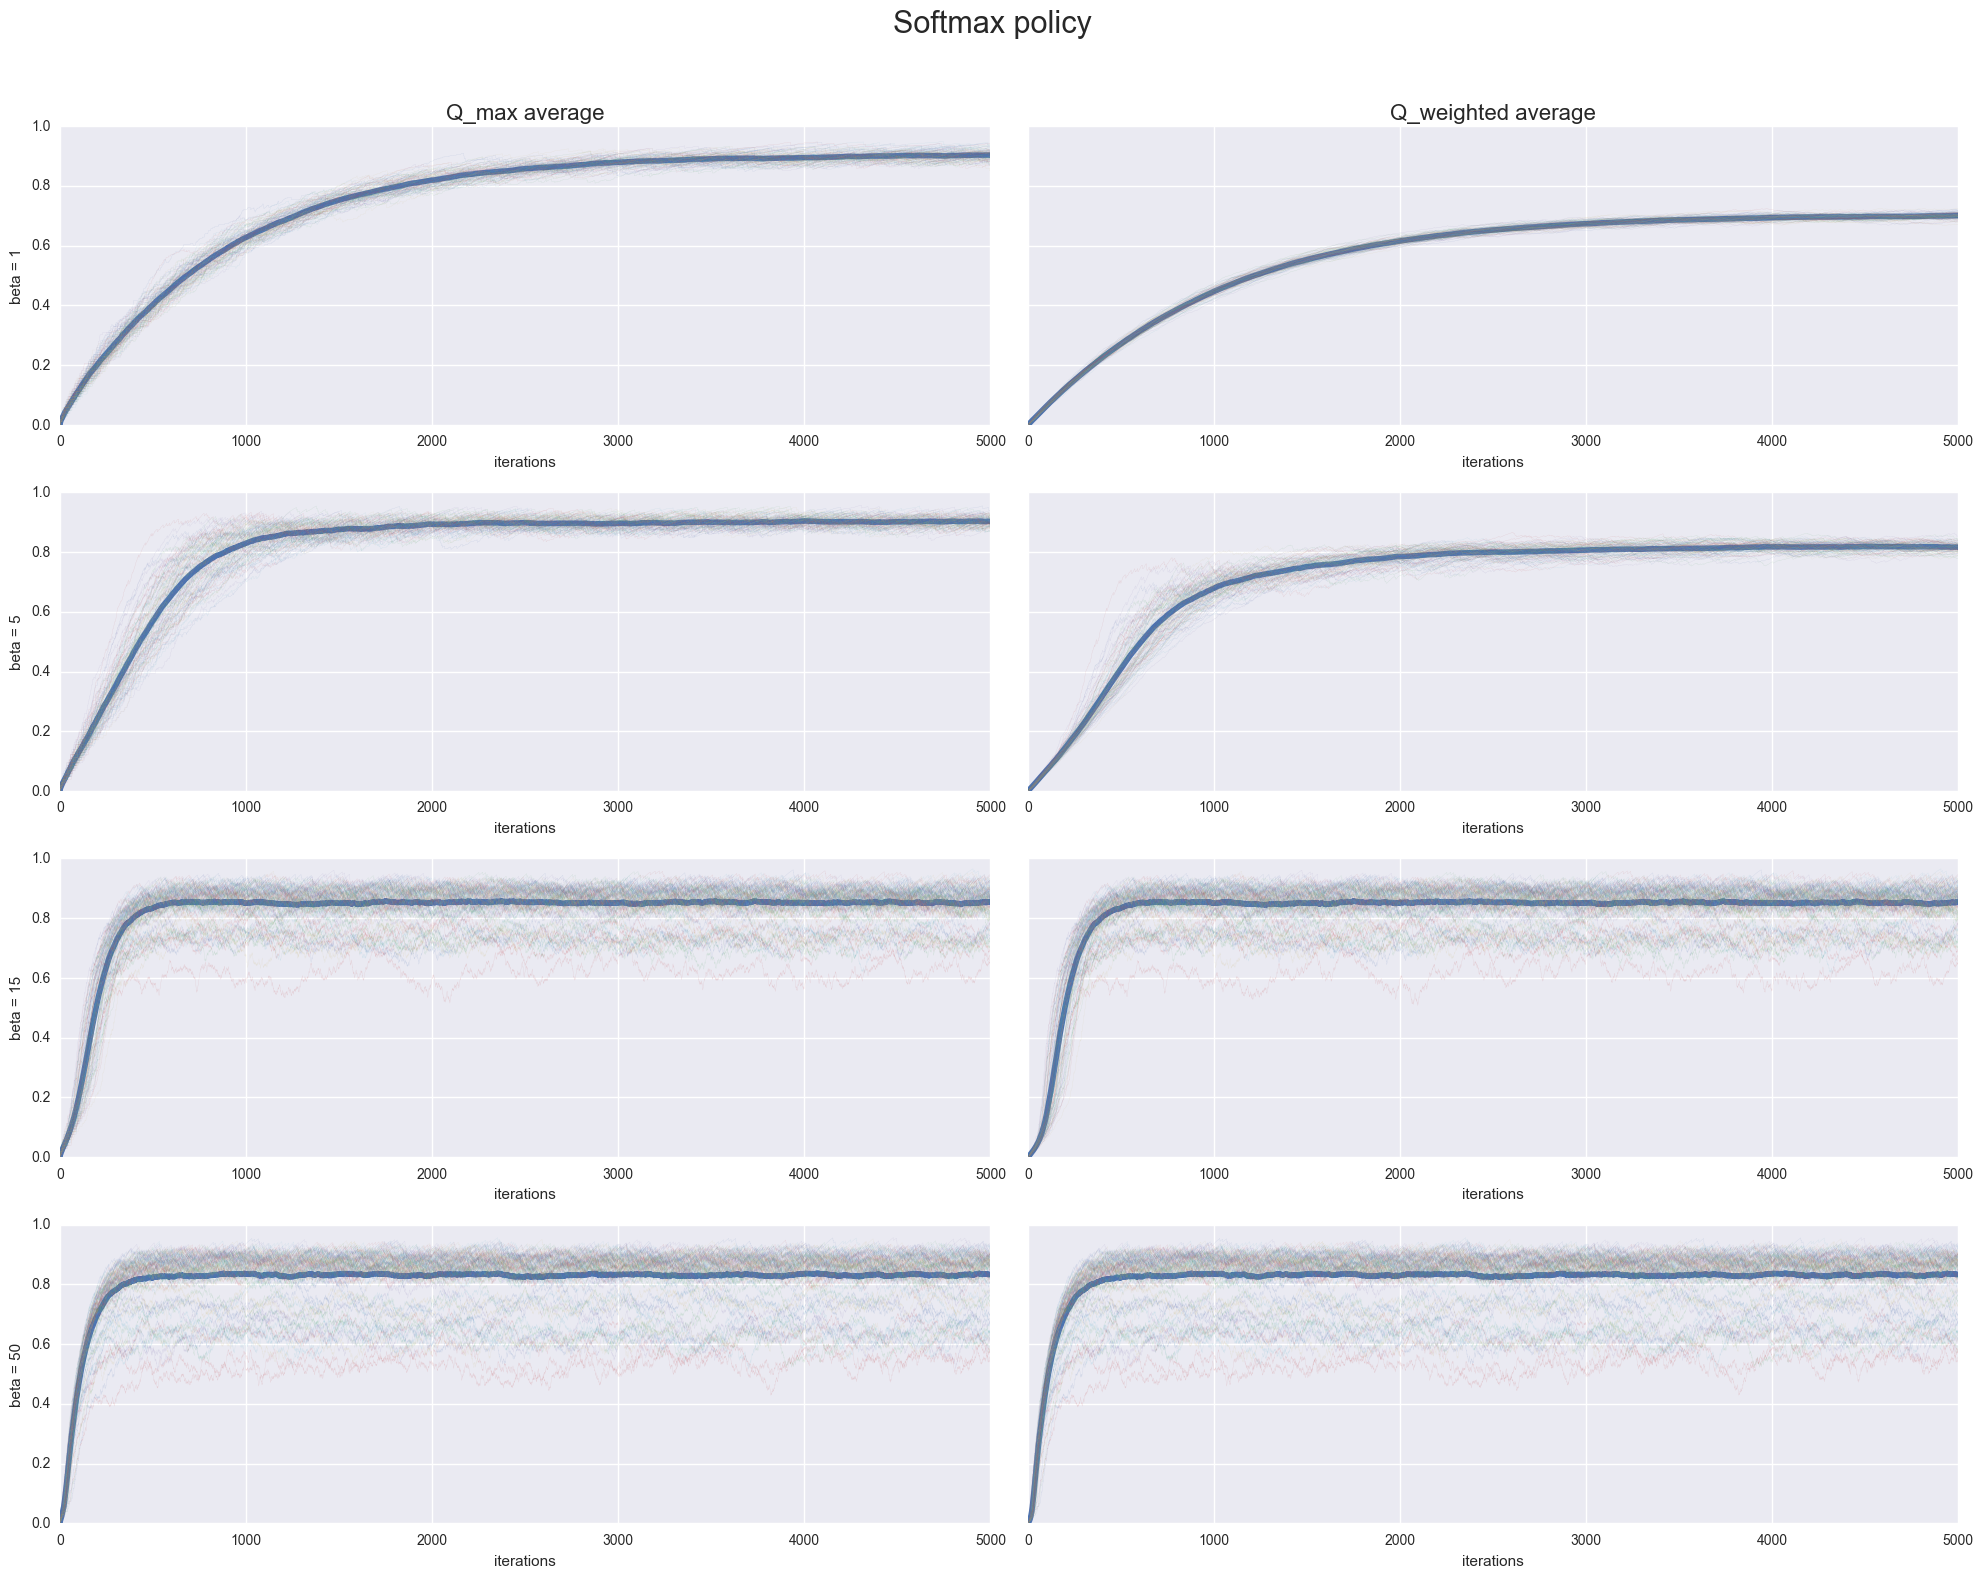

In [13]:
fig, axs = plt.subplots(4, 2, figsize = (20,15), sharey=True)
for i in range(4):
    axs[i, 0].plot(Q_max_avg[i, :], lw = 4)
    for trial in Q_max[i]:
        axs[i, 0].plot(trial, alpha = 0.2, lw = 0.2)
    axs[i, 1].plot(Q_weighted_avg[i, :], lw = 4)
    for trial in Q_weighted[i]:
        axs[i, 1].plot(trial, alpha = 0.2, lw = 0.2)
    axs[i,0].set_ylabel('beta = {}'.format(betas[i]))
axs[0,0].set_title('Q_max average', fontsize= 16)
axs[0,1].set_title('Q_weighted average', fontsize= 16)
fig.suptitle('Softmax policy', fontsize = 22, y = 1.05)
plt.setp(axs, xlabel = 'iterations')
fig.tight_layout()
plt.show()

Larger beta results in more exploitation because the differences in Q-values are amplified, so the larger Q-values are chosen relatively more often whereas low beta decreases these differences.
For the Q_max it leads to faster convergence, and higher Q_weighted values.
From beta = 15 to 50 convergence only improves marginally on average, but there's a larger variabiliy among the individual trials.
Softmax policy does not show any significant improvement.


#### 1.8

In [14]:
p_store = agent.p
factor_store = agent.factor

factor = np.ones(agent.num_levers)
factor[-1] = -5000
agent.p[-1] = 1.0
agent.factor = factor

eps,beta = 0.1, 15
t_max = int(1e3)
num_agents = 500

In [15]:
Q_max = np.zeros((2, num_agents, t_max))
Q_weighted = np.zeros((2, num_agents, t_max))
Q = np.zeros((2, agent.num_levers, t_max))

for n in range(num_agents):
    q_max = np.zeros(t_max)
    agent.reset_agent()
    for t in range(1, t_max):
        q_max[t], inds_updated = agent.eps_greedy(eps = eps)
        Q[0, :,t] = agent.Q 
        Q_weighted[0, n, t] = (1-agent.eps) * q_max[t] + (agent.eps/agent.num_levers) * np.sum(agent.Q) 
    Q_max[0, n] = q_max  
    
    agent.reset_agent()
    
    for t in range(1, t_max):
        q_max[t], inds_updated = agent.softmax(beta = beta)
        Q[1, :,t] = agent.Q 
        Q_weighted[1, n, t] = np.dot(agent.P, Q[1, :, t])
    Q_max[1, n] = q_max

In [16]:
Q_weighted_avg = Q_weighted.mean(axis = 1)
Q_max_avg = Q_max.mean(axis = 1)

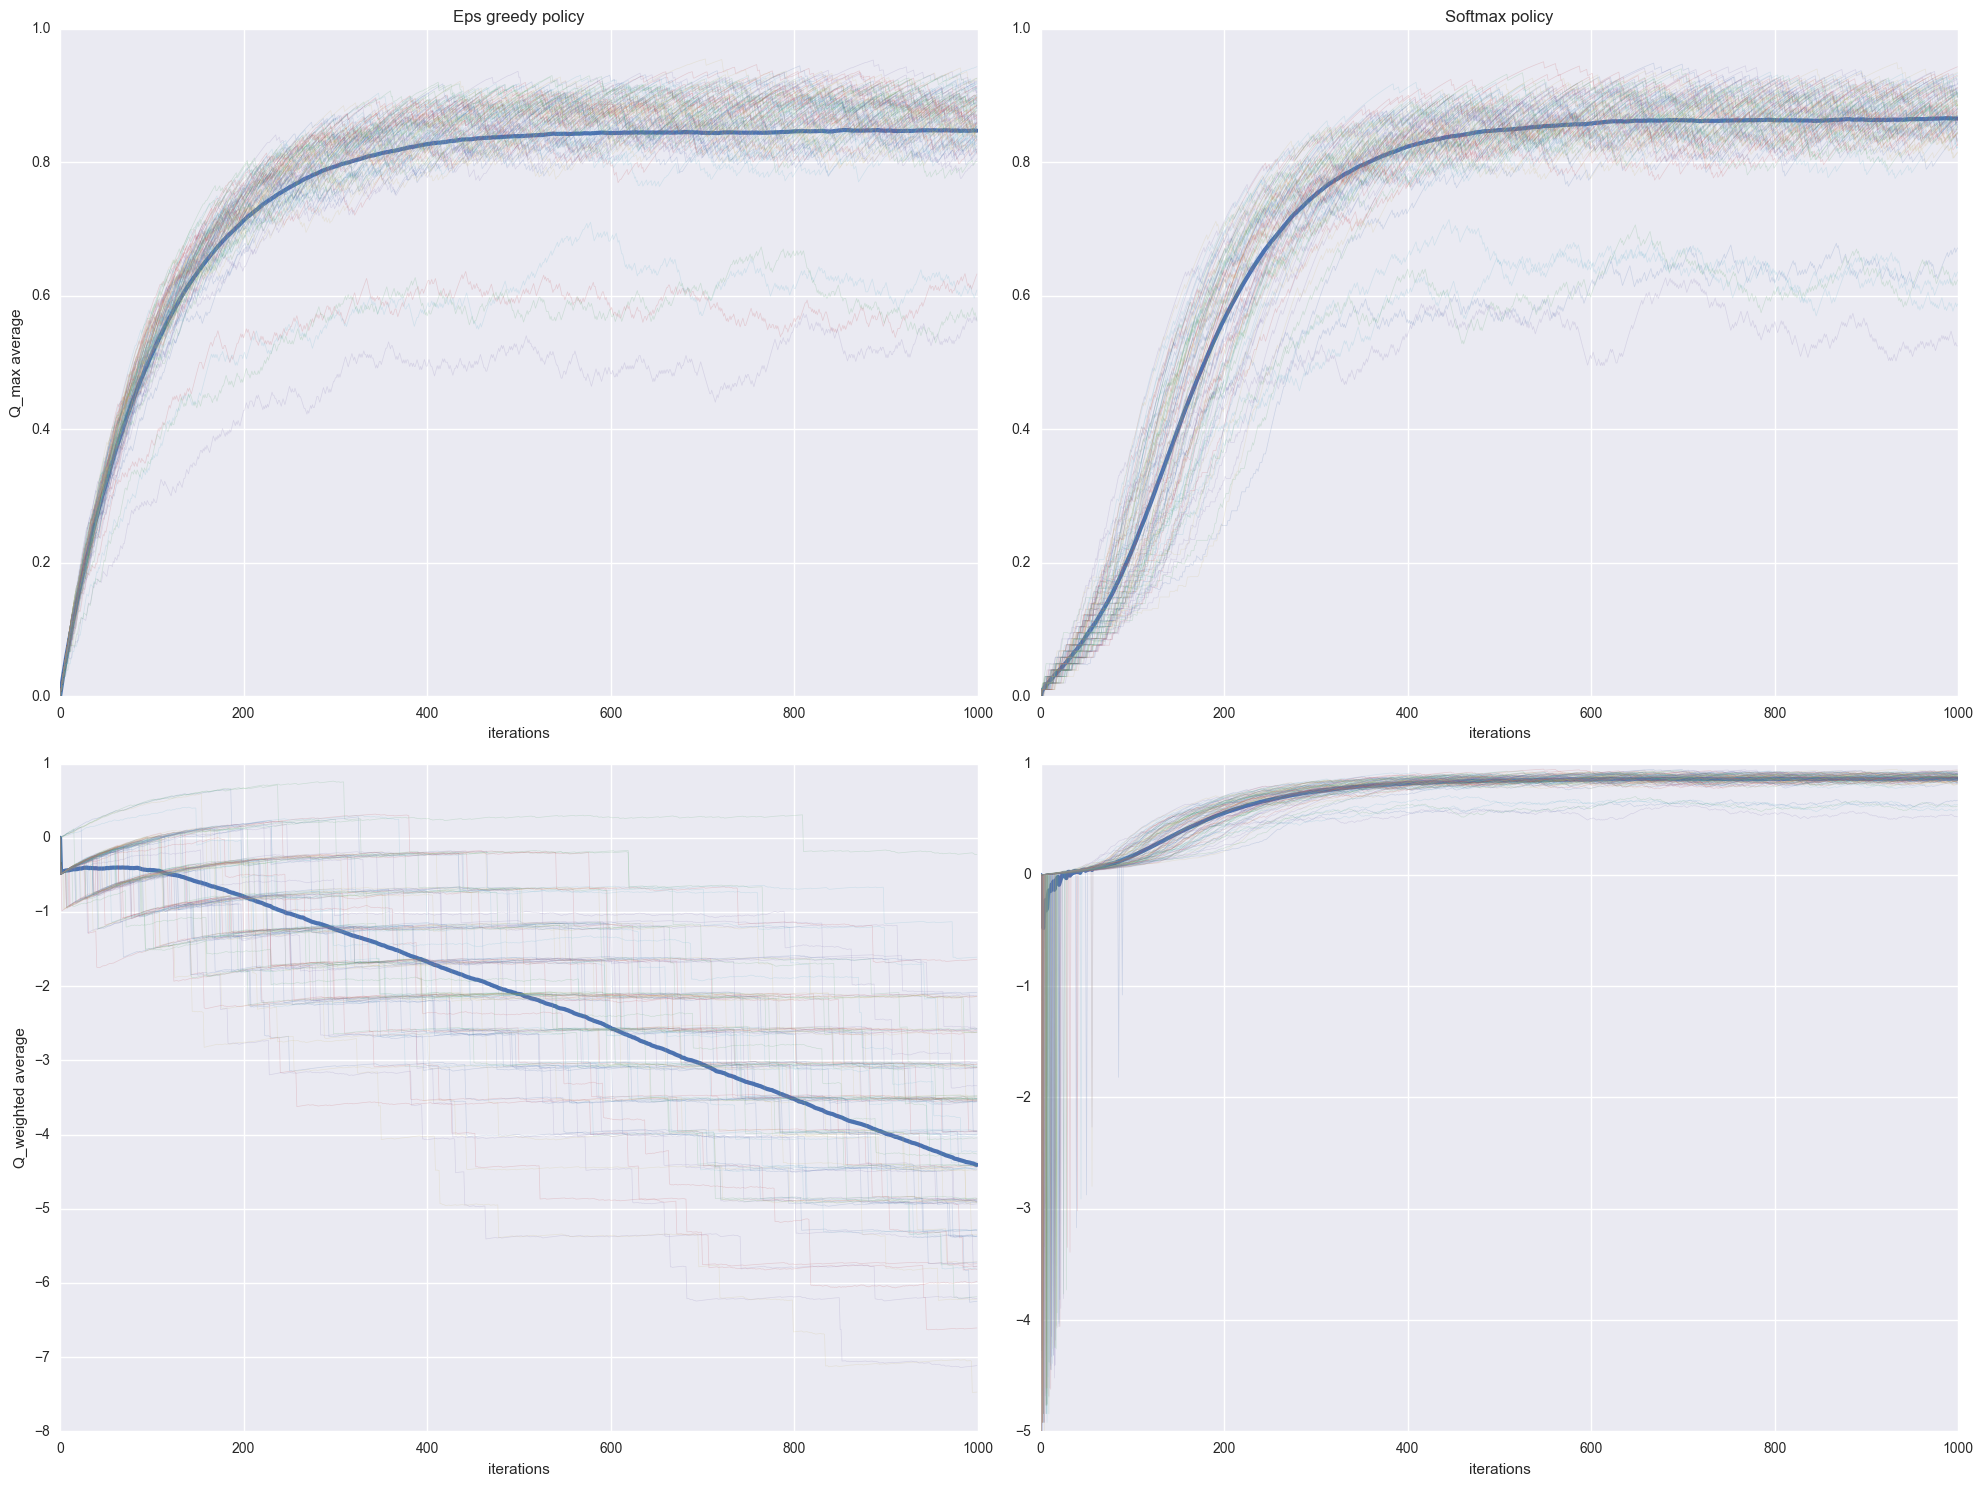

In [17]:
fig, axs = plt.subplots(2,2, figsize = (20,15))
axs[0, 0].plot(Q_max_avg[0], lw = 3.0)
for q in Q_max[0][:100]:
    axs[0, 0].plot(q, alpha = 0.2, lw = 0.5)
axs[1, 0].plot(Q_weighted_avg[0], lw = 3.0)
for q in Q_weighted[0][:100]:
    axs[1,0].plot(q, alpha = 0.2, lw = 0.5)
axs[0,0].set_title('Eps greedy policy')

axs[0, 1].plot(Q_max_avg[1], lw = 3.0)
for q in Q_max[1][:100]:
    axs[0, 1].plot(q, alpha = 0.2, lw = 0.5)
axs[1, 1].plot(Q_weighted_avg[1], lw = 3.0)
for q in Q_weighted[1][:100]:
    axs[1, 1].plot(q, alpha = 0.2, lw = 0.5)
axs[0,0].set_ylabel("Q_max average")
axs[1,0].set_ylabel("Q_weighted average")
axs[0,1].set_title('Softmax policy')
plt.setp(axs, xlabel = 'iterations')
fig.tight_layout()
plt.show()

Softmax converges to a higher value but with a lower rate. This is because epsilon greedy mostly pickes one maximum Q-value which it updates the most being that it's greedy but it's not always the optimal action, whereas Softmax tends to achieve the optimal results more often.
The average Q_weighed shows that the eps greedy policy more sensitive to outlier actions because there's no mechanism to exclude them from the list of possible actions. On the other hand using Softmax Q_weighed converges to a positive value because it learns to never choose the heavily punishing action.


#### 1.9

In [4]:
t_max = int(2e3)
num_lifes = 100
betas = [0.1, 0.4, 1.6, 6.4, 25.6]

#agent.p = p_store
#agent.factor = factor_store
profit = np.zeros((len(betas), num_lifes, t_max))
Q_max = np.zeros((len(betas), num_lifes, t_max))
Q = np.zeros((len(betas), agent.num_levers, t_max))
Q_weighted = np.zeros((len(betas), num_lifes, t_max))
P_test = []
for b, beta in enumerate(betas):
    for n in range(num_lifes):
        q_max = np.zeros(t_max)
        agent.reset_agent()
        for t in range(1, t_max):
            agent.beta = 1 + t/beta
            q_max[t], inds_updated = agent.softmax(beta = agent.beta)
            Q[b, :, t] = agent.Q #store Q_t
            Q_weighted[b, n, t] = np.dot(agent.P, Q[b, :, t])
            profit[b, n, t] = agent.profit
        Q_max[b, n] = q_max
    

In [5]:
#one particular softmax with beta = 5...
beta = 5
Q_max_compare = np.zeros((num_lifes, t_max))
Q_weighted_compare = np.zeros((num_lifes, t_max))
Q_compare = np.zeros((agent.num_levers, t_max))
profit_compare = np.zeros((num_lifes, t_max))
for n in range(num_lifes):
    q_max = np.zeros(t_max)
    agent.reset_agent()
    for t in range(1, t_max):
        q_max[t], inds_updated = agent.softmax(beta = beta)
        Q_compare[:, t] = agent.Q #store Q_t
        Q_weighted_compare[n, t] = np.dot(agent.P, Q_compare[:, t])
        profit_compare[n, t] = agent.profit
    Q_max_compare[n] = q_max

In [6]:
Q_max_compare_avg = Q_max_compare.mean(axis = 0)
Q_weighted_compare_avg = Q_weighted_compare.mean(axis = 0)

In [7]:
Q_weighted_avg = Q_weighted.mean(axis = 1)
Q_max_avg = Q_max.mean(axis=1)

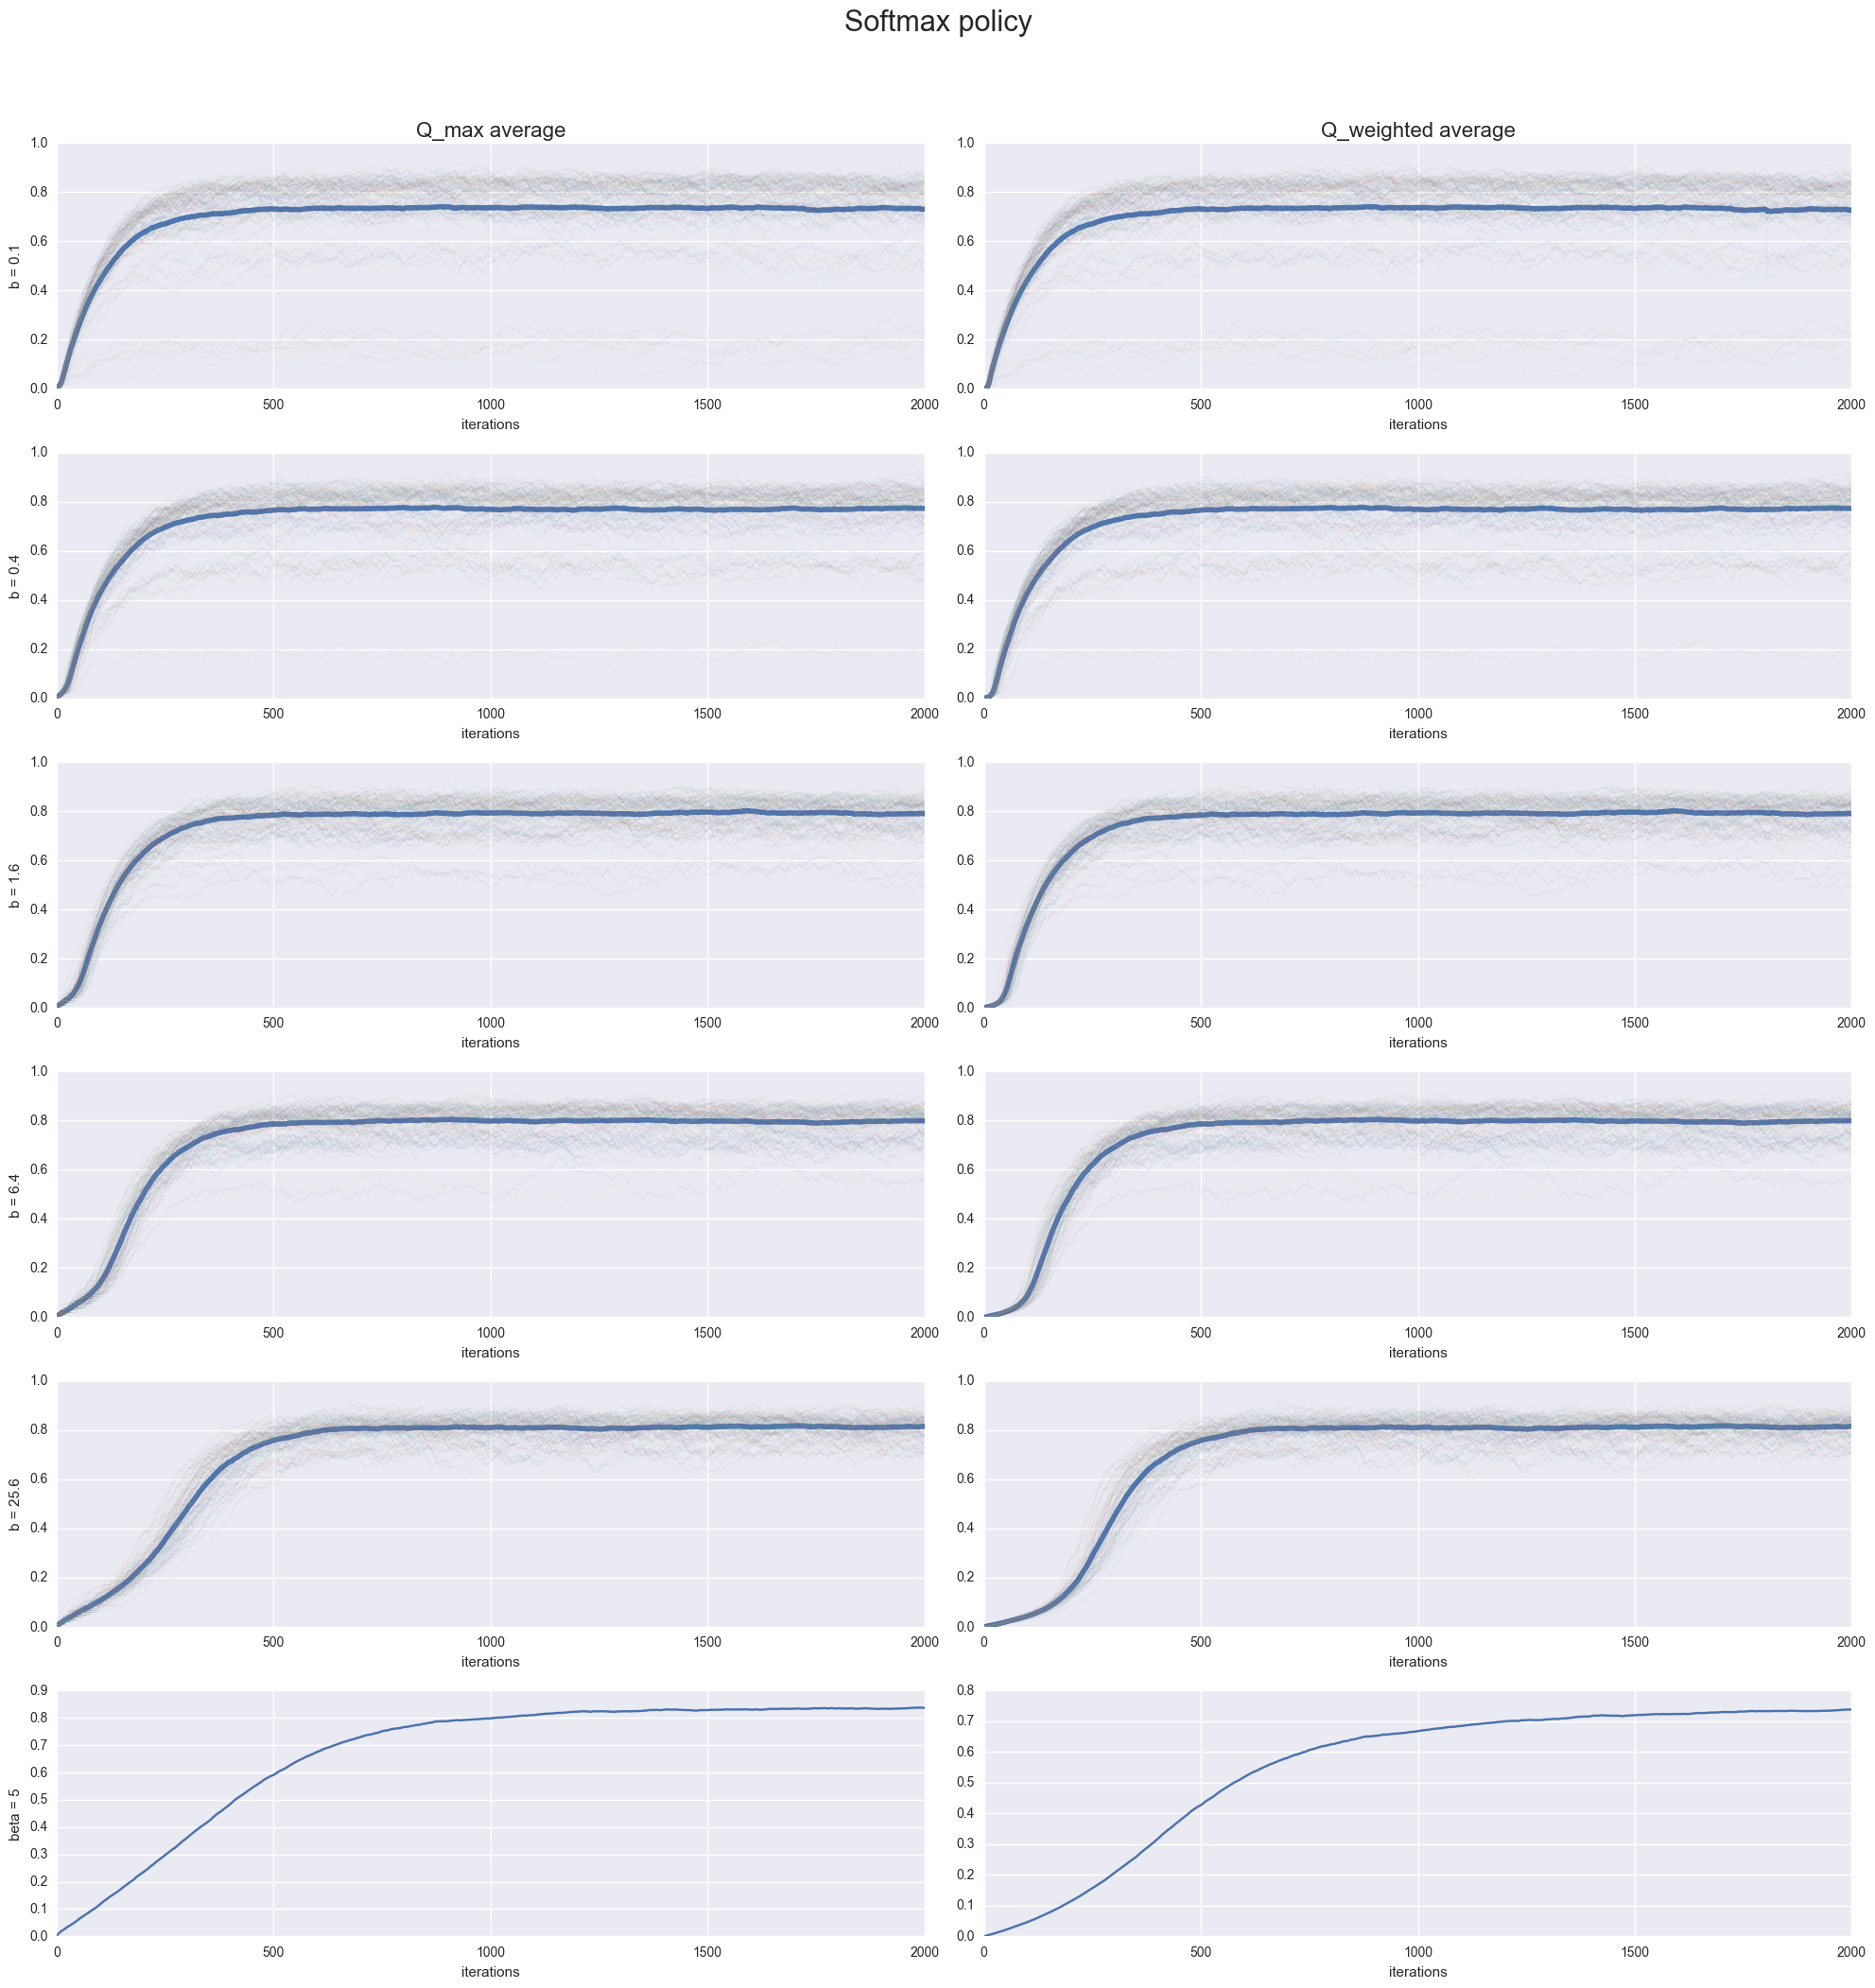

In [8]:
fig, axs = plt.subplots(6, 2, figsize = (20,20), sharey=False)
for i in range(5):
    axs[i, 0].plot(Q_max_avg[i, :], lw = 4)
    for trial in Q_max[i]:
        axs[i, 0].plot(trial, alpha = 0.2, lw = 0.2)
    axs[i, 1].plot(Q_weighted_avg[i, :], lw = 4)
    for trial in Q_weighted[i]:
        axs[i, 1].plot(trial, alpha = 0.2, lw = 0.2)
    axs[i,0].set_ylabel('b = {}'.format(betas[i]))

axs[5,0].plot(Q_max_compare_avg)
axs[5,1].plot(Q_weighted_compare_avg)
axs[5,0].set_ylabel('beta = {}'.format(5))
axs[0,0].set_title('Q_max average', fontsize= 16)
axs[0,1].set_title('Q_weighted average', fontsize= 16)
fig.suptitle('Softmax policy', fontsize = 22, y = 1.05)
plt.setp(axs, xlabel = 'iterations')
fig.tight_layout()
plt.show()

Using the modified Softmax, the convergence is always faster.
For greedy settings (low b), the expected Q_max values are smaller than for normal Softmax's.


In [9]:
profit_avg = profit.mean(axis = 1)
profit_comp_avg = profit_avg.mean(axis = 0)

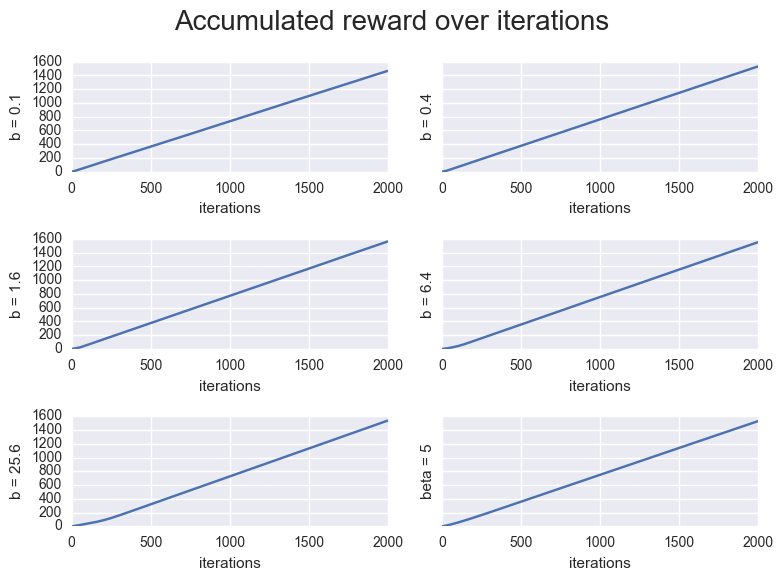

In [11]:
fig, axs = plt.subplots(3,2,sharey=True)
axs = axs.ravel()
for i in range(len(axs)-1):
    axs[i].plot(profit_avg[i])
    axs[i].set_ylabel('b = {}'.format(betas[i]))
axs[5].plot(profit_comp_avg)
axs[5].set_ylabel('beta = {}'.format(5))
plt.setp(axs, xlabel = 'iterations')
fig.suptitle('Accumulated reward over iterations', fontsize = 20, y=1.05)
fig.tight_layout()

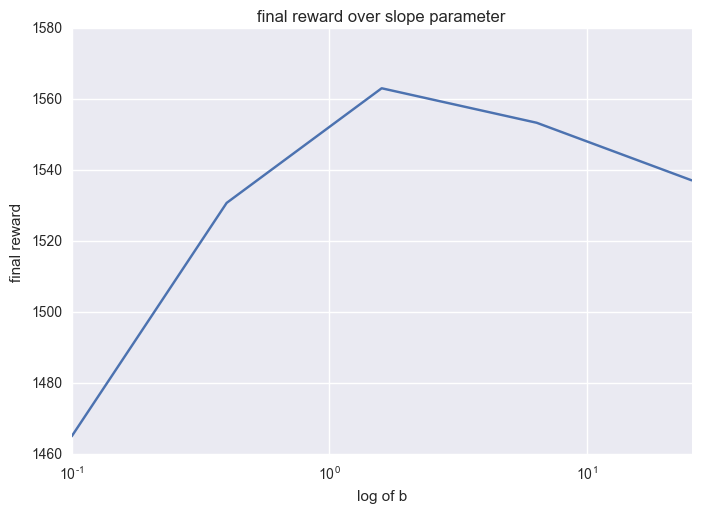

In [27]:
final_rewards = profit[:, :, -1].mean(axis = 1)
plt.plot(betas, final_rewards)
plt.xticks(np.log(betas))
plt.xscale('log')
plt.xlabel('log of b')
plt.ylabel('final reward')
plt.title('final reward over slope parameter')
plt.xlim(0, betas[-1]);
plt.show()

Slope parameter b = 1.6 produces the highest final reward.
Using increasing betas allowes the agent to focus more exploration early on and exploitation once the optimal action is found.
This is why the Q_max average converges faster.


For eps greedy, one can just start with a large epsilon value and decrease it over time (eg. eps = eps0/t).